# Import section

All necessary imports should be placed here.


In [27]:
from utils import *
from numpy.linalg import eig

# Task Implementation

The selected parametrized matrices are presented below, each associated with its respective stability, and it is important to highlight that the parameter $\alpha$ has been chosen as 0.50.


$\mathbf{A}_{\text{stable node}} = \begin{bmatrix} -\alpha & 0 \\ 0 & -\alpha \end{bmatrix}$

$\mathbf{A}_{\text{stable focus}} = \begin{bmatrix} -\alpha & \alpha \\ -\alpha & -\alpha \end{bmatrix}$

$\mathbf{A}_{\text{unstable saddle}} = \begin{bmatrix} \alpha & 0 \\ 0 & -\alpha \end{bmatrix}$

$\mathbf{A}_{\text{unstable node}} = \begin{bmatrix} \alpha & 0 \\ 0 & \alpha \end{bmatrix}$

$\mathbf{A}_{\text{unstable focus}} = \begin{bmatrix} \alpha & \alpha \\ -\alpha & \alpha \end{bmatrix}$

## Constants

In [28]:
w = 1
Y, X = np.mgrid[-w:w:100j, -w:w:100j]
y0 = np.array([1, 1])

alpha = 1/2

plot_matrices = [
    {'A': np.array([[-alpha, 0], [0, -alpha]]), 'title': 'Stable Node'},
    {'A': np.array([[-alpha, alpha], [-alpha, -alpha]]), 'title': 'Stable Focus'},
    {'A': np.array([[alpha, 0], [0, -alpha]]), 'title': 'Unstable Saddle'},
    {'A': np.array([[alpha, 0], [0, alpha]]), 'title': 'Unstable Node'},
    {'A': np.array([[alpha, alpha], [-alpha, alpha]]), 'title': 'Unstable Focus'}
]

## Visualization

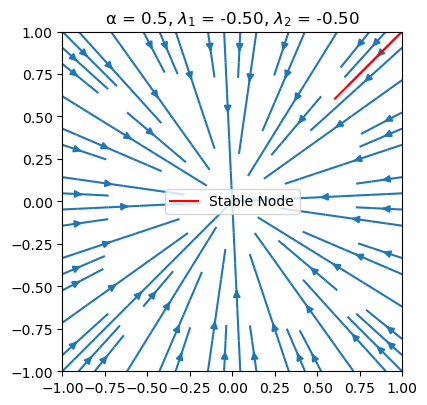

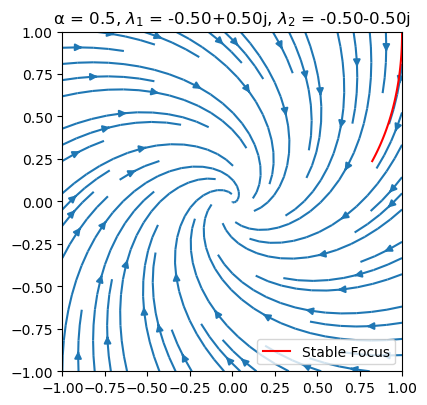

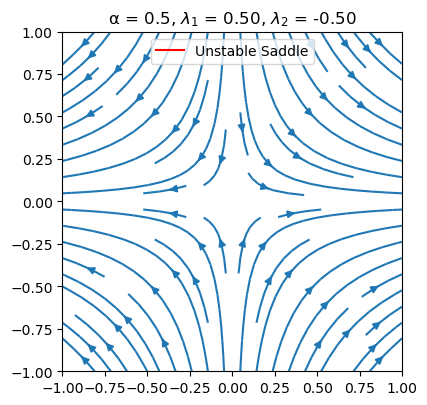

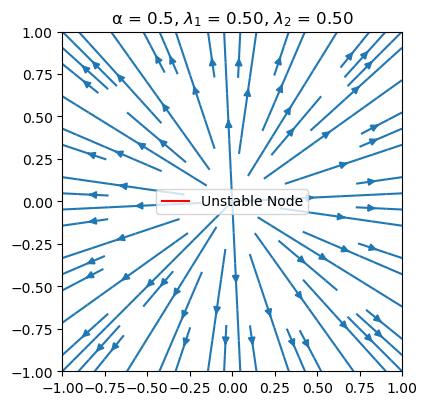

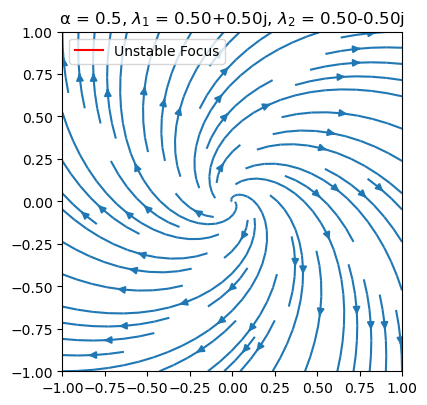

In [29]:
def plot_topological_classifications():
    """
    Plot topological classifications.

    This function plots the topological classifications based on the given plot_matrices.
    It calculates the eigenvalues of each plot matrix, solves the differential equation using Euler's method,
    and plots the phase portrait along with the trajectory.

    Parameters:
        None

    Returns:
        None
    """
    for i, plot_matrix in enumerate(plot_matrices):
        A = plot_matrix['A']
        eigenvalues = eig(A)[0]
        time = np.linspace(0, 1, 50)

        yt, time = solve_euler(lambda y: A@y, y0, time)

        ax0 = plot_phase_portrait(A, X, Y)
        ax0.plot(yt[:, 0], yt[:, 1], c='red', label=plot_matrix['title'])
        ax0.set_title(f"α = {1/2}, $λ_1$ = {eigenvalues[0]:.2f}, $λ_2$ = {eigenvalues[1]:.2f}"); 
        ax0.legend()
        
plot_topological_classifications()
